# 绘图功能

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 分散式数据集可视化
Visualizing the distribution of a dataset

http://seaborn.pydata.org/tutorial/distributions.html

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
# 设置随机变数种子
np.random.seed(sum(map(ord, "distributions")))

```
sns.distplot(a,   # Series, 1d-array, or list.
    bins=None,    # argument for matplotlib hist(), or None, optional
    hist=True,    # bool, Whether to plot a (normed) histogram.
    kde=True,     # bool, Whether to plot a gaussian kernel density estimate.
    rug=False,    # bool, Whether to draw a rugplot on the support axis.
    fit=None,     # An object with `fit` method
    hist_kws=None,# Keyword arguments for hist
    kde_kws=None, # Keyword arguments for kde
    rug_kws=None, # Keyword arguments for rug
    fit_kws=None, # Keyword arguments for fit
    color=None,   # Color to plot everything but the fitted curve in.
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
```

### 单变数分布绘图

In [5]:
# 产生数据集
x = np.random.normal(size=100)

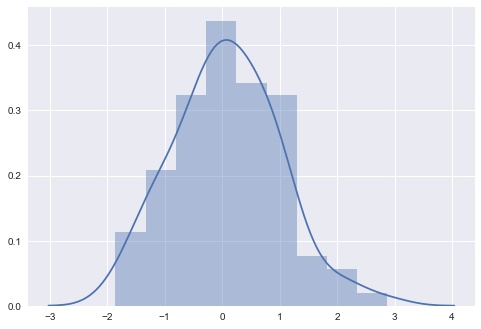

In [6]:
sns.distplot(x);

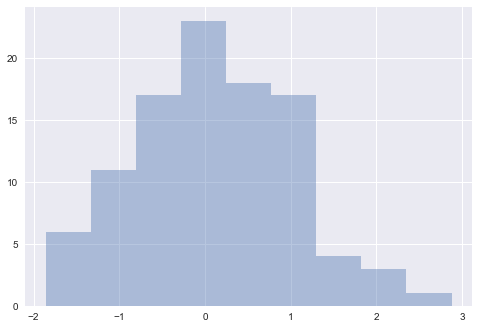

In [7]:
# 柱状图
sns.distplot(x, kde=False, rug=False);

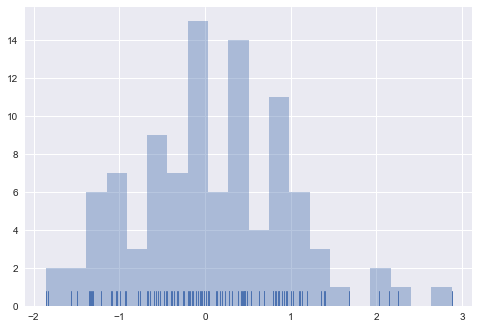

In [8]:
# 画出样本点
sns.distplot(x, bins=20, kde=False, rug=True);

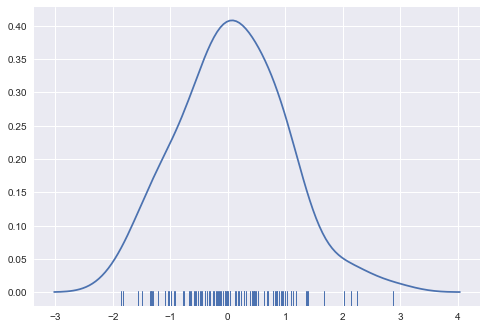

In [9]:
# KDE 核密度估计
sns.distplot(x, hist=False, rug=True);

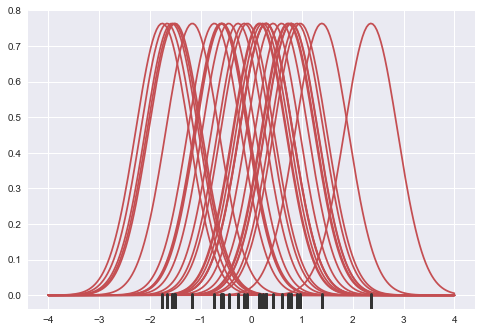

In [10]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

# 标识x
sns.rugplot(x, color=".2", linewidth=3);

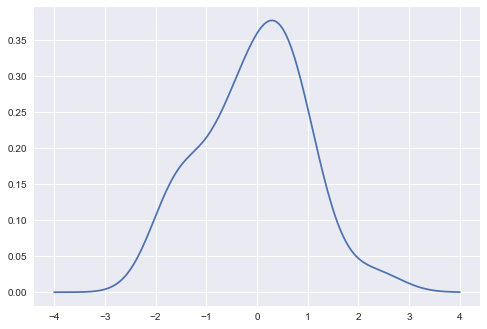

In [11]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

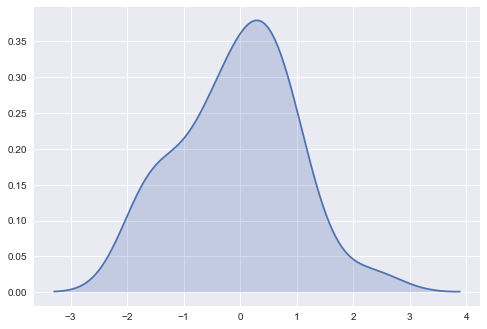

In [12]:
# 简化 sns.distplot(x, hist=False, kde_kws={'shade':True})
sns.kdeplot(x, shade=True);

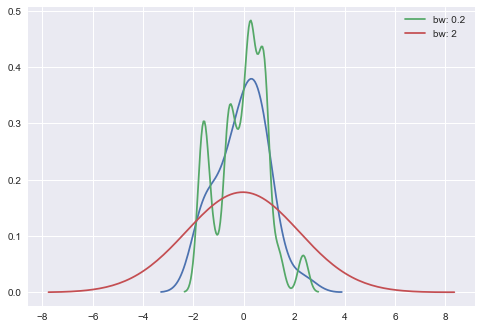

In [13]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

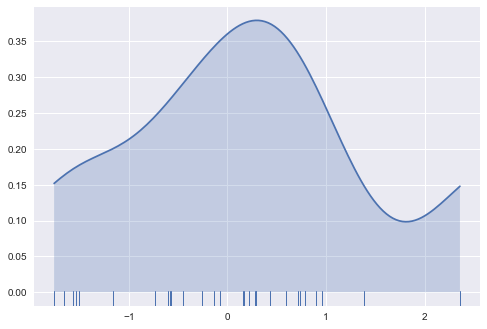

In [14]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

#### 分布匹配

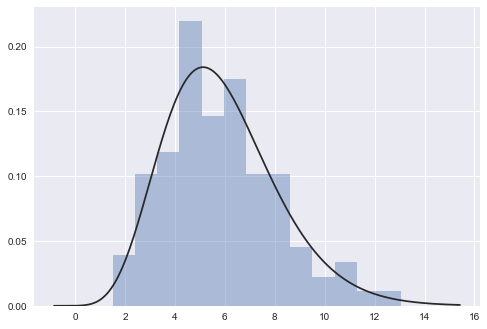

In [15]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

### 双变数分布绘图

```
sns.jointplot(
    x, y,              # Data or names of variables in ``data``
    data=None,         # DataFrame when ``x`` and ``y`` are variable names.
    kind='scatter',    # { "scatter" | "reg" | "resid" | "kde" | "hex" }
    stat_func=<function pearsonr at 0x11212d230>,
    color=None,        # Color used for the plot elements
    size=6,            # Size of the figure 
    ratio=5,           # Ratio of joint axes size to marginal axes height.
    space=0.2,         # Space between the joint and marginal axes
    dropna=True,       # If True, remove observations that are missing from ``x`` and ``y``.
    xlim=None,         # x-axis limit to set before plotting.
    ylim=None,         # y-axis limit to set before plotting.
    joint_kws=None,    # Additional keyword arguments for the plot components.
    marginal_kws=None, # Additional keyword arguments for the plot components.
    annot_kws=None,    # Additional keyword arguments for the plot components.
    **kwargs)
```

In [17]:
mean, cov = [0, 1], [(1, .8), (.8, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

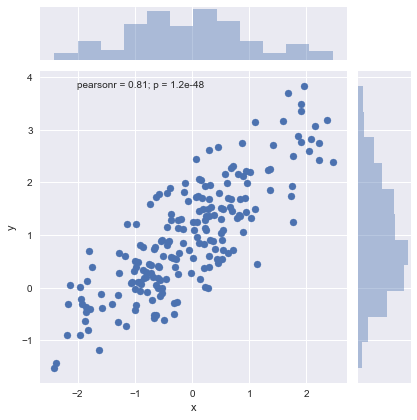

In [18]:
# 散点图
sns.jointplot(x="x", y="y", data=df);

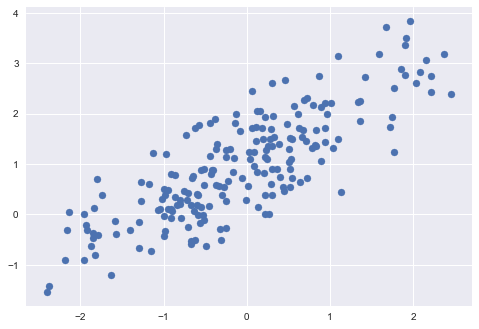

In [19]:
# 用 matplotlib 画出类似的
plt.scatter(df.x, df.y)

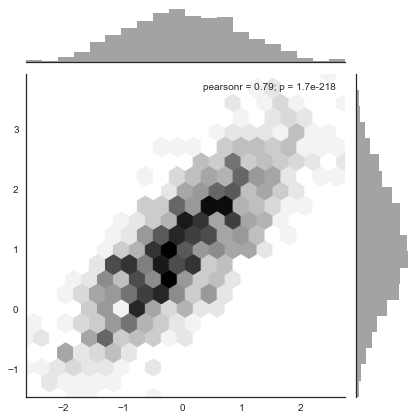

In [20]:
# 蜂窝图
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

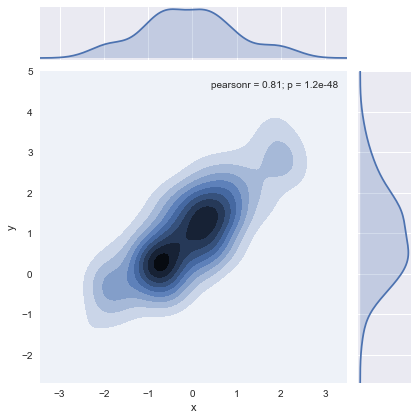

In [21]:
# 核密度
sns.jointplot(x="x", y="y", data=df, kind="kde");

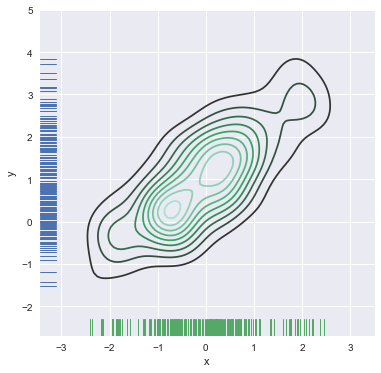

In [22]:
# kde + rug
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

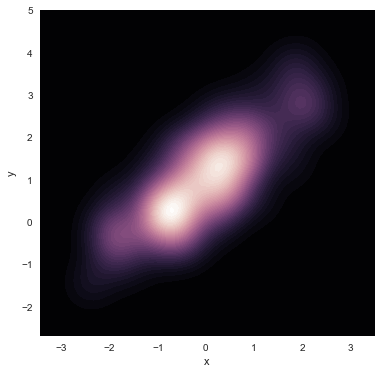

In [23]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

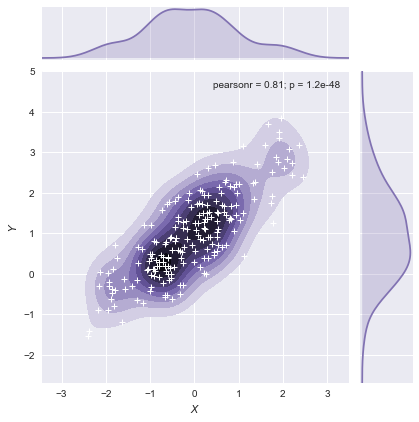

In [24]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### Visualizing pairwise relationships in a dataset

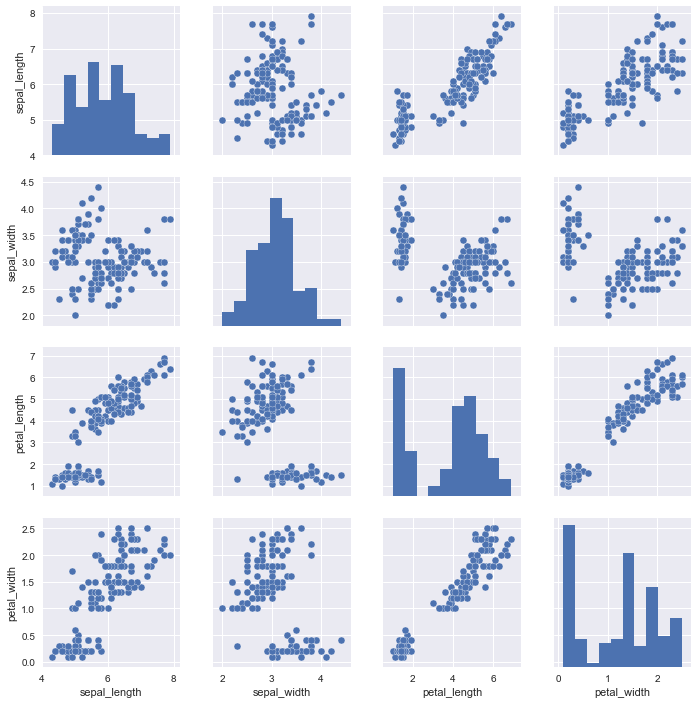

In [25]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


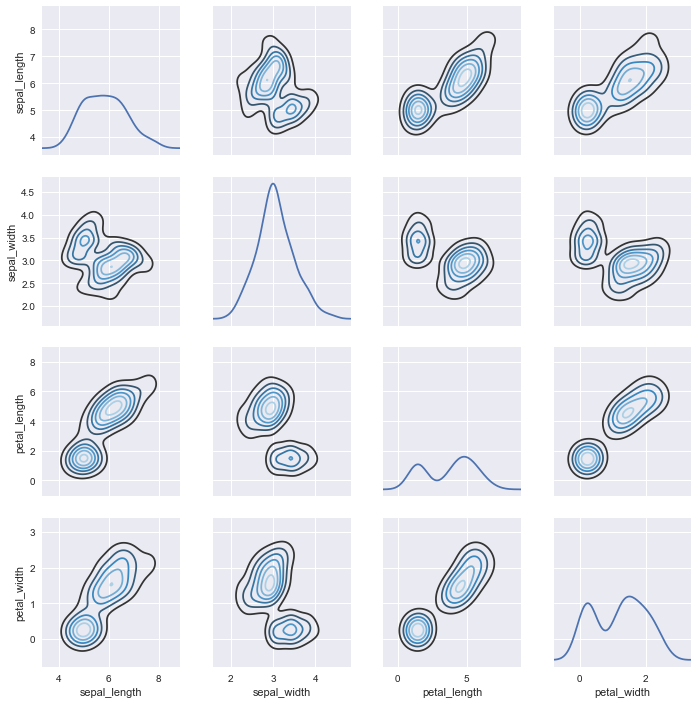

In [26]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

## 线性关系可视化

In [27]:
import seaborn as sns
sns.set(color_codes=True)

In [28]:
np.random.seed(sum(map(ord, "regression")))

In [34]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 线性回归模型绘画函数

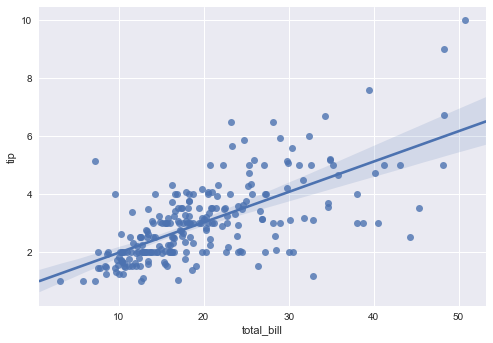

In [30]:
# regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data
sns.regplot(x="total_bill", y="tip", data=tips);

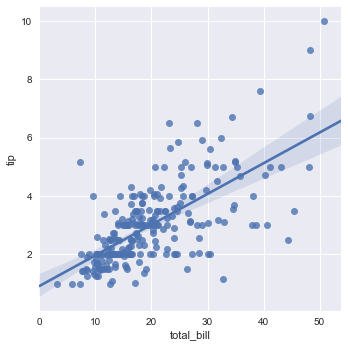

In [31]:
# lmplot() has data as a required parameter and the x and y variables must be specified as strings
sns.lmplot(x="total_bill", y="tip", data=tips);

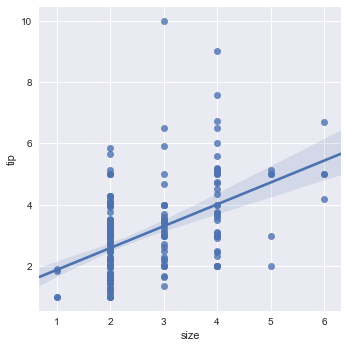

In [36]:
# to fit a linear regression when one of the variables takes discrete values
sns.lmplot(x="size", y="tip", data=tips);

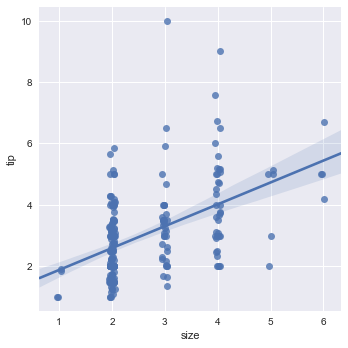

In [40]:
# add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. 
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

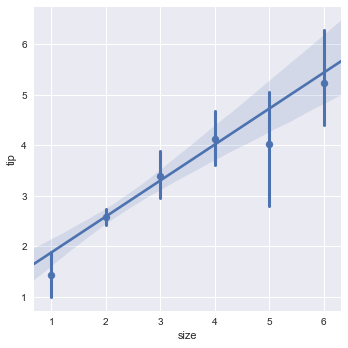

In [41]:
# A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### 适配不同模型

In [42]:
anscombe = sns.load_dataset("anscombe")

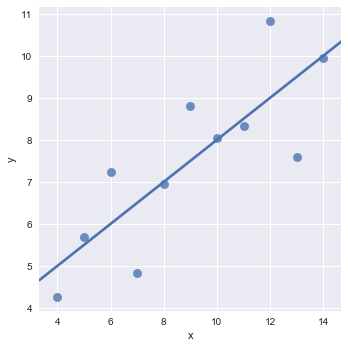

In [43]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

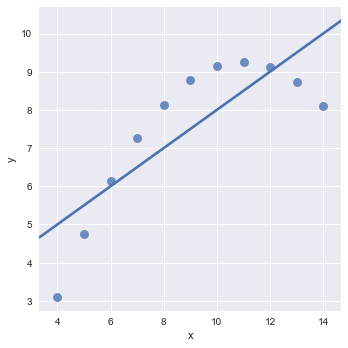

In [44]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

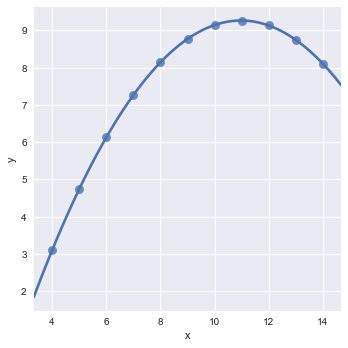

In [46]:
# 适配多项式回归模型
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

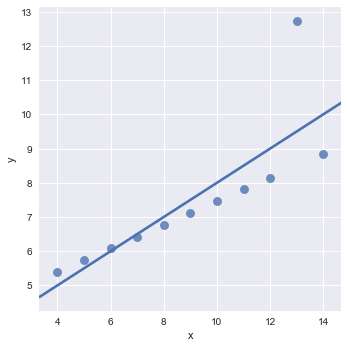

In [47]:
# “outlier” 影响适配结果
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

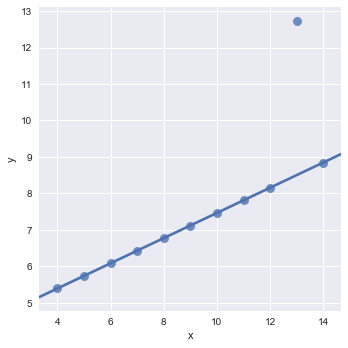

In [49]:
# 使用 robust 忽略 outlier
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

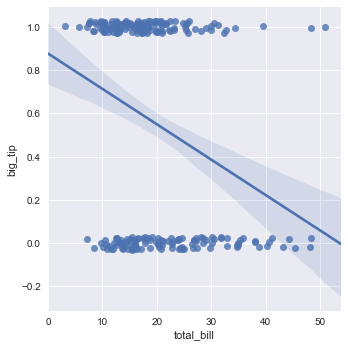

In [50]:
# 当 Y 值是二元，简单线性回归
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

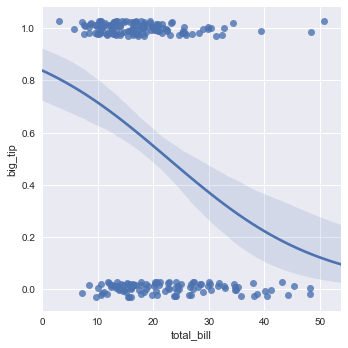

In [51]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

### Controlling the size and shape of the plot

### Plotting a regression in other contexts

## Plotting with categorical data

### Categorical scatterplots

### Distributions of observations within categories

### Statistical estimation within categories

### Plotting “wide-form” data

### Drawing multi-panel categorical plots